<a href="https://colab.research.google.com/github/utkarshnsr/NBA-Subreddit-GOAT-Analysis/blob/main/NBA_Subreddit_LeBron_Posts_Headline_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
pip install praw

The authentication part of the code has been hidden. 

In [297]:
subreddit = rro.subreddit("nba")

In [298]:
print(f"Subreddit Display Name: {subreddit.display_name}")

Subreddit Display Name: nba


In [299]:
import pandas as pd

In [300]:
from IPython import display
import math
from pprint import pprint
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

In [301]:
pip install twython

In [302]:
import nltk

In [303]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [304]:
def constructPlayerDf(playerName):
  relatedPosts = subreddit.search(f"({playerName} goat)",limit=None,time_filter="all")
  postsDict = {"Title": [], "Post URL": []}

  for post in relatedPosts:
      postsDict["Title"].append(post.title)
      postsDict["Post URL"].append(post.url)


  postsDf = pd.DataFrame(postsDict)
  return postsDf

In [305]:
def getSentimentAnalysis(postsDf):
  #Sentiment Intensity Analyzer
  sia = SIA()
  results = []

  headlinesList = list(postsDf['Title'])

  for headline in headlinesList:
    polScore = sia.polarity_scores(headline)
    polScore['headline'] = headline
    results.append(polScore)
  
  analysisResults = pd.DataFrame.from_records(results)
  analysisResults['Sentiment Label'] = 0
  analysisResults.loc[analysisResults['compound'] > 0.2, 'Sentiment Label'] = 1
  analysisResults.loc[analysisResults['compound'] < -0.2, 'Sentiment Label'] = -1
  analysisResults.loc[analysisResults['Sentiment Label'] == 1, 'Sentiment Label'] = "Positive"
  analysisResults.loc[analysisResults['Sentiment Label'] == -1, 'Sentiment Label'] = "Negative"
  analysisResults.loc[analysisResults['Sentiment Label'] == 0, 'Sentiment Label'] = "Neutral"

  return analysisResults, results

In [306]:
def visualizeResults(analysisResults, playerName):
  sentimentPercentages = analysisResults['Sentiment Label'].value_counts(normalize=True)
  sentimentDict = dict(sentimentPercentages)
  sLabel = sentimentDict.keys()
  sValues = list(sentimentDict.values())

  plt.bar(sLabel,sValues,align="center")
  plt.xlabel("Sentiment Labels")
  plt.ylabel("Percentages")
  plt.ylim(0.0, 0.6)
  plt.title(f"{playerName} Sentiment Visualization")
  for i in range(len(sValues)):
    plt.text(i, round(sValues[i],2),round(100 * sValues[i], 2), ha='center',va='bottom')
  plt.show()



## Michael Jordan GOAT Post Headlines Analysis

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



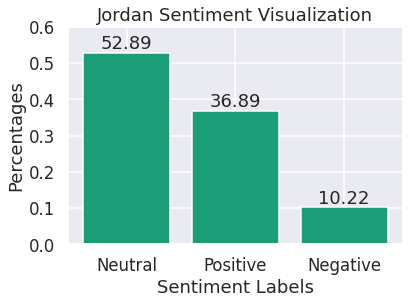

In [307]:
jordanPostsDf = constructPlayerDf("Jordan")
jordanAnalysisResult, jordanResult = getSentimentAnalysis(jordanPostsDf)
visualizeResults(jordanAnalysisResult, "Jordan")

## LeBron GOAT Post Headlines Analysis

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It appears that you are using PRAW in an asynchronous environment.
It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



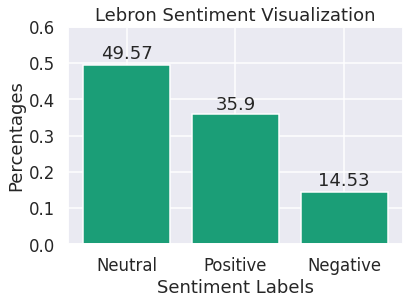

In [308]:
leBronPostsDf = constructPlayerDf("Lebron")
leBronAnalysisResult, leBronResult = getSentimentAnalysis(leBronPostsDf)
visualizeResults(leBronAnalysisResult, "Lebron")

Based on these results, it is fair to assume that Jordan has more support for GOAT discussion. This is the initial analysis. Further study can be done for better results.